# A/B Testing - Facebook vs. Adwords
* To evaluate the performance of Facebook vs AdWords campaigns using A/B testing on key advertising metrics to determine which platform delivers better ROI and engagement.

# Tools & Libraries Used
* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Jupyter Notebook
* R
* SQL

## 1. Import Libraries + Load Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from scipy.stats import ttest_ind

In [13]:
df = pd.read_csv('A_B_testing.csv')

In [14]:
df

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,12/22/2021,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,12/24/2021,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,12/25/2021,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,12/25/2021,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,12/26/2021,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12/17/2024,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74
996,12/18/2024,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,12/18/2024,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14
998,12/20/2024,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98


### Understanding Metrics Before Proceeding
* **CTR**: Click through rate
* **CVR**: Conversion rate
* **CPC**: Cost per click
* **CPA**: Cost per acquisition
* **ROAS**: Return on ad spend

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_campaign          1000 non-null   object 
 1   facebook_ad_campaign      1000 non-null   object 
 2   facebook_ad_views         1000 non-null   int64  
 3   facebook_ad_clicks        1000 non-null   int64  
 4   facebook_ad_conversions   1000 non-null   int64  
 5   facebook_cost_per_ad      1000 non-null   int64  
 6   facebook_ctr              1000 non-null   float64
 7   facebook_conversion_rate  1000 non-null   float64
 8   facebook_cost_per_click   1000 non-null   float64
 9   adword_ad_campaign        1000 non-null   object 
 10  adword_ad_views           1000 non-null   int64  
 11  adword_ad_clicks          1000 non-null   int64  
 12  adword_ad_conversions     1000 non-null   int64  
 13  adword_cost_per_ad        1000 non-null   int64  
 14  adword_ct

In [16]:
df.isnull().sum()

date_of_campaign            0
facebook_ad_campaign        0
facebook_ad_views           0
facebook_ad_clicks          0
facebook_ad_conversions     0
facebook_cost_per_ad        0
facebook_ctr                0
facebook_conversion_rate    0
facebook_cost_per_click     0
adword_ad_campaign          0
adword_ad_views             0
adword_ad_clicks            0
adword_ad_conversions       0
adword_cost_per_ad          0
adword_ctr                  0
adword_conversion_rate      0
adword_cost_per_click       0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
# Changing column names for better readability and ease of use in the code

df.rename(columns={'date_of_campaign': 'Date',
                  'facebook_ad_campaign': 'Fb_Campaign',
                 'facebook_ad_views': 'Fb_Views',
                 'facebook_ad_clicks': 'Fb_Clicks',
                 'facebook_ad_conversions': 'Fb_Conversions',
                 'facebook_cost_per_ad': 'Fb_CostPerAd',
                 'facebook_ctr': 'Fb_Ctr',
                 'facebook_conversion_rate': 'Fb_ConversionRate',
                 'facebook_cost_per_click': 'Fb_Cpc',
                 'adword_ad_campaign': 'Aw_Campaign',
                 'adword_ad_views': 'Aw_Views',
                 'adword_ad_clicks': 'Aw_Clicks',
                 'adword_ad_conversions': 'Aw_Conversions',
                 'adword_cost_per_ad': 'Aw_CostPerAd',
                 'adword_ctr': 'Aw_Ctr',
                 'adword_conversion_rate': 'Aw_ConversionRate',
                 'adword_cost_per_click': 'Aw_Cpc'}, inplace = True)

In [19]:
df

,Date,Fb_Campaign,Fb_Views,Fb_Clicks,Fb_Conversions,Fb_CostPerAd,Fb_Ctr,Fb_ConversionRate,Fb_Cpc,Aw_Campaign,Aw_Views,Aw_Clicks,Aw_Conversions,Aw_CostPerAd,Aw_Ctr,Aw_ConversionRate,Aw_Cpc
0,12/22/2021,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,12/24/2021,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,12/25/2021,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,12/25/2021,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,12/26/2021,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12/17/2024,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74
996,12/18/2024,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,12/18/2024,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14
998,12/20/2024,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98


In [21]:
# Converting the data type of Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [22]:
df

,Date,Fb_Campaign,Fb_Views,Fb_Clicks,Fb_Conversions,Fb_CostPerAd,Fb_Ctr,Fb_ConversionRate,Fb_Cpc,Aw_Campaign,Aw_Views,Aw_Clicks,Aw_Conversions,Aw_CostPerAd,Aw_Ctr,Aw_ConversionRate,Aw_Cpc
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-12-17,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74
996,2024-12-18,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14
998,2024-12-20,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98


In [23]:
df['Date'].nunique()

658

In [27]:
df.groupby('Date')[['Fb_Campaign','Aw_Campaign']].nunique().sort_values(by='Date', ascending=False)

,Fb_Campaign,Aw_Campaign
Date,,
2024-12-20,1,1
2024-12-18,1,1
2024-12-17,1,1
2024-12-13,1,1
2024-12-11,1,1
...,...,...
2021-12-27,1,1
2021-12-26,1,1
2021-12-25,1,1


In [31]:
# For better analysis, I thought of reshaping the data to long format for doing groupby and run comparisons

fb_df = df[['Date','Fb_Views','Fb_Clicks','Fb_Conversions','Fb_CostPerAd','Fb_Ctr','Fb_ConversionRate','Fb_Cpc']].copy()
fb_df.columns = ['Date','Views','Clicks','Conversions','CostPerAd','CTR','ConversionRate','CPC']
fb_df['Platform'] = 'Facebook'

aw_df = df[['Date','Aw_Views','Aw_Clicks','Aw_Conversions','Aw_CostPerAd','Aw_Ctr','Aw_ConversionRate','Aw_Cpc']].copy()
aw_df.columns = ['Date','Views','Clicks','Conversions','CostPerAd','CTR','ConversionRate','CPC']
aw_df['Platform'] = 'Adwords'

df = pd.concat([fb_df,aw_df], ignore_index=True)

In [32]:
df

,Date,Views,Clicks,Conversions,CostPerAd,CTR,ConversionRate,CPC,Platform
0,2021-12-22,3172,62,14,141,1.95,22.58,2.27,Facebook
1,2021-12-24,3211,38,9,186,1.18,23.68,4.89,Facebook
2,2021-12-25,1936,53,15,66,2.74,28.30,1.25,Facebook
3,2021-12-25,1194,45,9,71,3.77,20.00,1.58,Facebook
4,2021-12-26,2479,44,12,174,1.77,27.27,3.95,Facebook
...,...,...,...,...,...,...,...,...,...
1995,2024-12-17,4275,73,3,54,1.71,4.11,0.74,Adwords
1996,2024-12-18,4749,55,5,116,1.16,9.09,2.11,Adwords
1997,2024-12-18,4582,36,4,149,0.79,11.11,4.14,Adwords
1998,2024-12-20,4877,66,6,65,1.35,9.09,0.98,Adwords


### Insights:
* Column names were renamed to make them easier to read and work with in the code.
* The dataset does not contain any missing (null) values.
* Since some dates appeared more than once, we assumed that multiple ad campaigns could run on the same day.
* The original data was in a wide format, so we reshaped it into a long format to make the analysis easier. This allowed us to use functions like groupby for comparing Facebook and AdWords campaigns more effectively.

## 2. Exploratory Data Analysis

In [37]:
df.groupby('Platform').describe()[['Views','Clicks']]

Views                                                      \
           count      mean     min      25%     50%      75%     max   
Platform                                                               
Adwords   1000.0  4771.438  3715.0  4258.25  4808.5  5300.75  5754.0   
Facebook  1000.0  2152.031  1050.0  1600.25  2123.5  2706.25  3320.0   

                      Clicks                                                   
                 std   count    mean   min   25%   50%   75%   max        std  
Platform                                                                       
Adwords   598.647684  1000.0  60.128  31.0  45.0  60.0  75.0  89.0  17.047822  
Facebook  661.982166  1000.0  44.196  15.0  30.0  44.5  58.0  73.0  16.833328

In [43]:
df.groupby('Platform').describe()[['Conversions','CTR']]

Conversions                                                   CTR  \
               count    mean  min  25%   50%   75%   max       std   count   
Platform                                                                     
Adwords       1000.0   5.933  3.0  4.0   6.0   8.0   9.0  2.011606  1000.0   
Facebook      1000.0  11.975  5.0  8.0  12.0  16.0  19.0  4.298471  1000.0   

                                                               
             mean   min     25%   50%     75%   max       std  
Platform                                                       
Adwords   1.28095  0.54  0.9400  1.26  1.5700  2.37  0.402492  
Facebook  2.28316  0.49  1.3675  2.07  2.9225  6.86  1.206700

In [44]:
df.groupby('Platform').describe()[['ConversionRate','CPC']]

ConversionRate                                                  \
                  count      mean   min      25%    50%     75%     max   
Platform                                                                  
Adwords          1000.0  10.80751  3.37   6.9700   9.72  13.485   29.03   
Facebook         1000.0  32.69608  6.85  18.0525  27.12  41.880  118.75   

                        CPC                                              \
                std   count     mean   min     25%   50%     75%    max   
Platform                                                                  
Adwords    5.205133  1000.0  2.26554  0.58  1.4700  2.03  2.8025   6.19   
Facebook  20.570796  1000.0  4.31050  0.96  2.3375  3.60  5.6100  16.53   

                    
               std  
Platform            
Adwords   1.101846  
Facebook  2.751582

Text(0.5, 1.0, 'CTR Over Time')

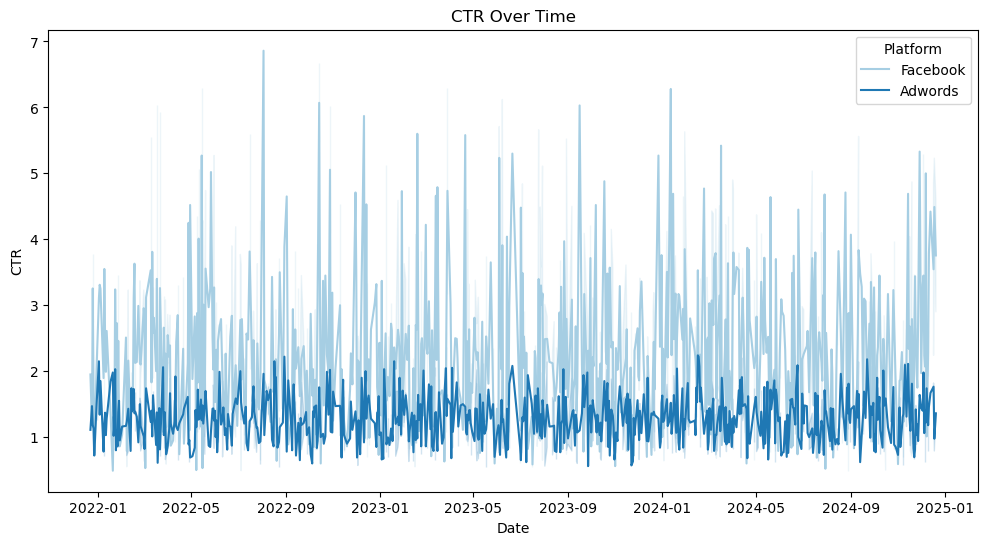

In [36]:
# Analyzing time trends

plot.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='CTR', hue='Platform', palette='Paired')
plot.title('CTR Over Time')

#### A/B Testing - Statistical Analysis of CTR 

In [59]:
fb = df[df['Platform'] == 'Facebook']
aw = df[df['Platform'] == 'Adwords']

t_stat, p_val = ttest_ind(fb['CTR'], aw['CTR'], equal_var=False)
print("CTR - t-statistic: ", t_stat, " | p_val:", p_val)

CTR - t-statistic:  24.914527350282636  | p_val: 4.489219631688428e-111


### Insights:
* As we can see from the chart and statistics, there is a large difference of CTR between both the platforms of Facebook and Adwords.
* The t-stat value is very large and positive which means the average CTR for Facebook is higher than AdWords.
* The p-value is extremely small(practically zero) which means there is statistically significant difference in CTR between facebook ads and adword ads.
* The difference in CTR between Facebook and AdWords is real and not due to random chance. One platform is clearly performing better than the other in terms of CTR.

Text(0.5, 1.0, 'CPC Over Time')

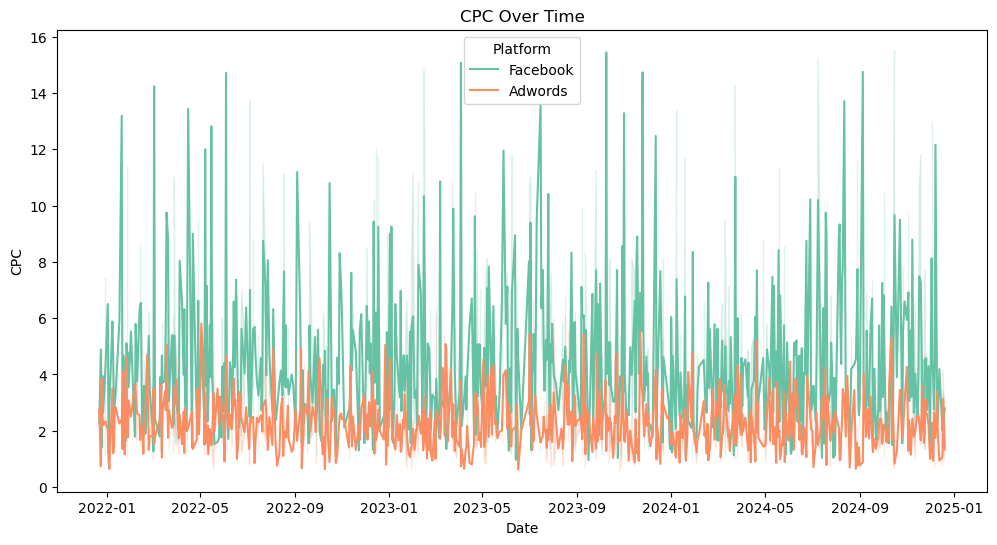

In [39]:
plot.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='CPC', hue='Platform', palette='Set2')
plot.title('CPC Over Time')

#### A/B Testing - Statistical Analysis of CPC

In [60]:
fb = df[df['Platform'] == 'Facebook']
aw = df[df['Platform'] == 'Adwords']

t_stat, p_val = ttest_ind(fb['CPC'], aw['CPC'], equal_var=False)
print("CPC - t-statistic: ", t_stat, " | p_val:", p_val)

CPC - t-statistic:  21.81761965852683  | p_val: 2.790108005850851e-90


### Insights:
* The analysis reveals a large difference in CPC between Facebook and AdWords campaigns, both visually (from the chart) and statistically.
* The t-statistic is very high and positive **(21.82)**, indicating that the average CPC for Facebook is significantly higher than that of AdWords.
* The p-value is extremely small **(~2.79e-90)**, which is effectively zero. This means the difference is statistically significant and not due to random chance.
* AdWords is more cost-effective in terms of CPC compared to Facebook, making it potentially a better option if minimizing cost per click is the goal.

Text(0.5, 1.0, 'Conversion Rate Over Time')

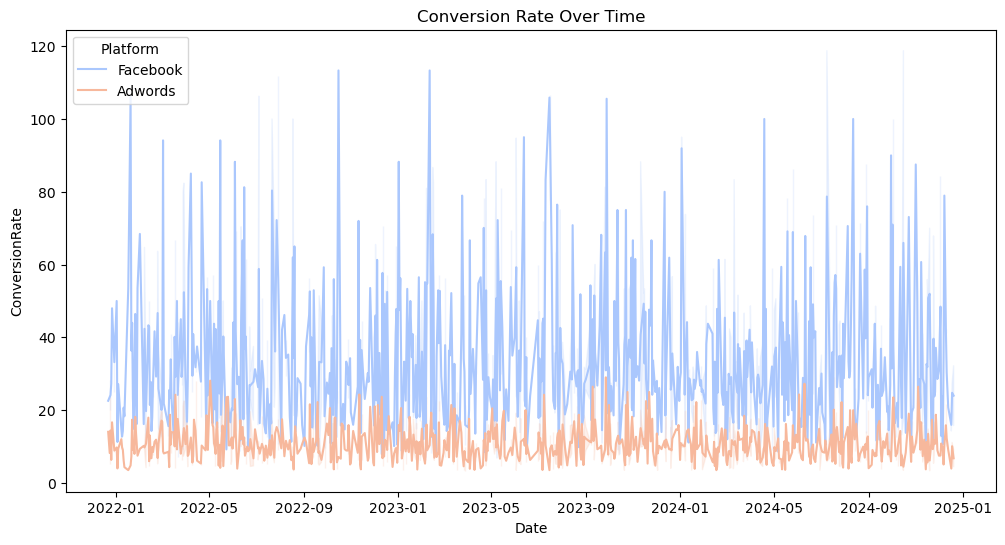

In [42]:
plot.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='ConversionRate', hue='Platform', palette='coolwarm')
plot.title('Conversion Rate Over Time')

#### A/B Testing - Statistical Analysis of Conversion Rate

In [62]:
fb = df[df['Platform'] == 'Facebook']
aw = df[df['Platform'] == 'Adwords']

t_stat, p_val = ttest_ind(fb['ConversionRate'], aw['ConversionRate'], equal_var=False)
print("Conversion Rate - t-statistic: ", t_stat, " | p_val:", p_val)

Conversion Rate - t-statistic:  32.62045547744514  | p_val: 7.116026506592085e-165


### Insights:
* The t-statistic is very high **(32.62)**, indicating a strong difference in conversion rates between Facebook and AdWords.
* The p-value is extremely small **(~7.12e-165)**, which confirms that this difference is statistically significant and not due to chance.
* This suggests that Facebook ads are significantly more effective at converting leads than AdWords campaigns.
* Facebook demonstrates a much higher conversion rate, making it a stronger platform for lead conversion in this dataset.

Text(0.5, 1.0, 'Clicks Over Time')

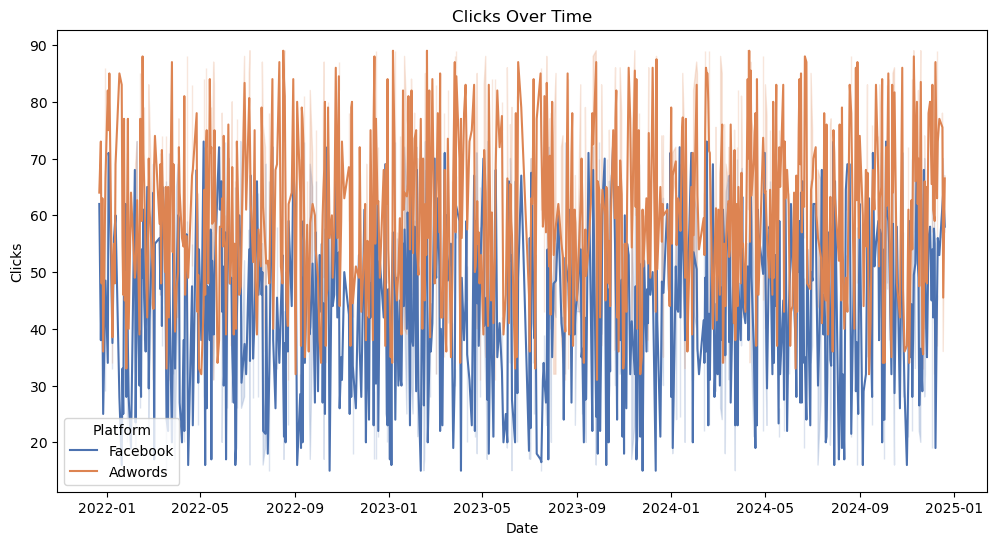

In [54]:
plot.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Clicks', hue='Platform', palette='deep')
plot.title('Clicks Over Time')


Text(0.5, 1.0, 'Views Over Time')

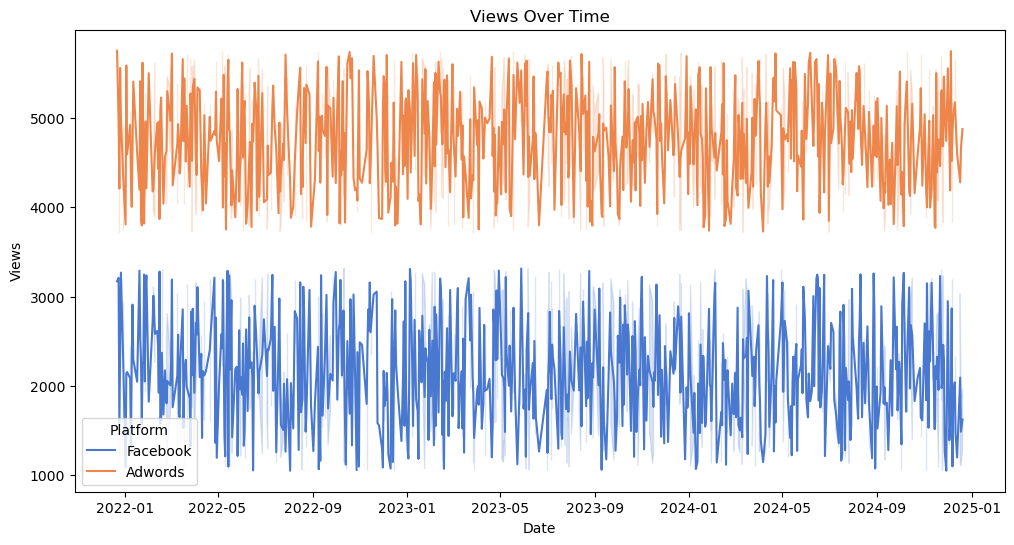

In [55]:
plot.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Views', hue='Platform', palette='muted')
plot.title('Views Over Time')

In [45]:
df['ConversionRate'].max()

118.75

In [46]:
df[df['ConversionRate'] == 118.75]

,Date,Views,Clicks,Conversions,CostPerAd,CTR,ConversionRate,CPC,Platform
846,2024-07-09,1516,16,19,244,1.06,118.75,15.25,Facebook
939,2024-10-16,3207,16,19,248,0.50,118.75,15.50,Facebook


In [47]:
244/19

12.842105263157896

In [58]:
fb = df[df['Platform'] == 'Facebook']
aw = df[df['Platform'] == 'Adwords']

t_stat, p_val = ttest_ind(fb['CTR'], aw['CTR'], equal_var=False)
print("CTR - t-statistic: ", t_stat, " | p_val:", p_val)

CTR - t-statistic:  24.914527350282636  | p_val: 4.489219631688428e-111


### Calculating Cost Per Conversion

In [64]:
df['CostPerConversion'] = round(df['CostPerAd']/df['Conversions'], 2)
df

,Date,Views,Clicks,Conversions,CostPerAd,CTR,ConversionRate,CPC,Platform,CostPerConversion
0,2021-12-22,3172,62,14,141,1.95,22.58,2.27,Facebook,10.07
1,2021-12-24,3211,38,9,186,1.18,23.68,4.89,Facebook,20.67
2,2021-12-25,1936,53,15,66,2.74,28.30,1.25,Facebook,4.40
3,2021-12-25,1194,45,9,71,3.77,20.00,1.58,Facebook,7.89
4,2021-12-26,2479,44,12,174,1.77,27.27,3.95,Facebook,14.50
...,...,...,...,...,...,...,...,...,...,...
1995,2024-12-17,4275,73,3,54,1.71,4.11,0.74,Adwords,18.00
1996,2024-12-18,4749,55,5,116,1.16,9.09,2.11,Adwords,23.20
1997,2024-12-18,4582,36,4,149,0.79,11.11,4.14,Adwords,37.25
1998,2024-12-20,4877,66,6,65,1.35,9.09,0.98,Adwords,10.83


In [68]:
df.groupby('Platform')['CostPerConversion'].agg(['max', 'min']).reset_index()

,Platform,max,min
0,Adwords,66.33,5.56
1,Facebook,49.80,3.21


In [69]:
df[round(df['CostPerConversion'], 2).isin([49.80, 66.33, 5.56, 3.21])]

,Date,Views,Clicks,Conversions,CostPerAd,CTR,ConversionRate,CPC,Platform,CostPerConversion
129,2022-05-20,1601,38,19,61,2.37,50.00,1.61,Facebook,3.21
229,2022-09-14,1666,34,18,100,2.04,52.94,2.94,Facebook,5.56
552,2023-09-08,1437,25,5,249,1.74,20.00,9.96,Facebook,49.80
1595,2023-10-21,4247,86,3,199,2.02,3.49,2.31,Adwords,66.33
1892,2024-08-28,4240,63,9,50,1.49,14.29,0.79,Adwords,5.56
1960,2024-11-14,3789,80,3,199,2.11,3.75,2.49,Adwords,66.33


Text(0, 0.5, 'Cost Per Conversion')

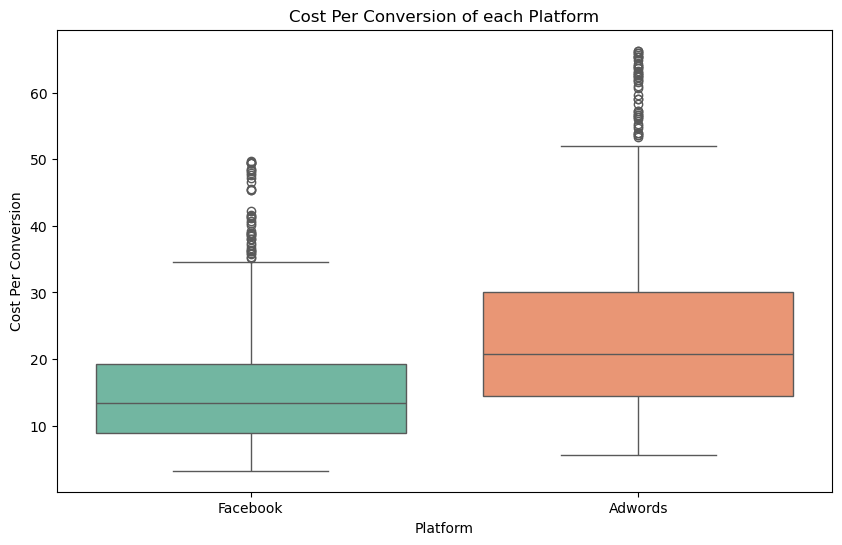

In [72]:
plot.figure(figsize=(10,6))
sns.boxplot(x='Platform', y='CostPerConversion', data=df, hue='Platform', palette='Set2')
plot.title('Cost Per Conversion of each Platform')
plot.ylabel('Cost Per Conversion')

### Insights:
* From the boxplot, it's clear that Facebook generally has a lower cost per conversion compared to AdWords, but both platforms show a wide range of variation.
* Facebook Ads show a more consistent cost pattern, with most conversions happening below ₹20. However, there are outliers where the cost shoots up to ₹50 and above, which is relatively high considering typical Meta Ad performance.
* AdWords, on the other hand, shows greater variability, with many conversions costing between ₹15 to ₹35, and some spiking up to ₹66, which is on the expensive side for most campaigns.
* According to my industry experiencen in performance marketing, a Cost Per Conversion above ₹40–50 is usually considered inefficient, unless it's a niche or high-ticket product. So these outliers highlight potential inefficiencies or poorly optimized campaigns.
* The median conversion cost for AdWords is clearly higher than Facebook, indicating that on average, Facebook is more cost-effective in generating leads or conversions.
* It's also important to note that while industry and campaign objectives do matter, these high-cost conversions could signal the need for better audience targeting, ad creative testing or budget reallocation.



In [76]:
df['Month'] = df['Date'].dt.strftime('%B %Y')
df

,Date,Views,Clicks,Conversions,CostPerAd,CTR,ConversionRate,CPC,Platform,CostPerConversion,Month
0,2021-12-22,3172,62,14,141,1.95,22.58,2.27,Facebook,10.07,December 2021
1,2021-12-24,3211,38,9,186,1.18,23.68,4.89,Facebook,20.67,December 2021
2,2021-12-25,1936,53,15,66,2.74,28.30,1.25,Facebook,4.40,December 2021
3,2021-12-25,1194,45,9,71,3.77,20.00,1.58,Facebook,7.89,December 2021
4,2021-12-26,2479,44,12,174,1.77,27.27,3.95,Facebook,14.50,December 2021
...,...,...,...,...,...,...,...,...,...,...,...
1995,2024-12-17,4275,73,3,54,1.71,4.11,0.74,Adwords,18.00,December 2024
1996,2024-12-18,4749,55,5,116,1.16,9.09,2.11,Adwords,23.20,December 2024
1997,2024-12-18,4582,36,4,149,0.79,11.11,4.14,Adwords,37.25,December 2024
1998,2024-12-20,4877,66,6,65,1.35,9.09,0.98,Adwords,10.83,December 2024


### Analyzing top 5 performing ads on Facebook and Adwords based on converions, cost per conversion and conversion rate

In [84]:
top5 = df.sort_values(by='Conversions', ascending=False).groupby('Platform').head(5).reset_index(drop=True)
top5

,Date,Views,Clicks,Conversions,CostPerAd,CTR,ConversionRate,CPC,Platform,CostPerConversion,Month
0,2024-11-24,1055,28,19,216,2.65,67.86,7.71,Facebook,11.37,November 2024
1,2023-11-15,1135,41,19,230,3.61,46.34,5.61,Facebook,12.11,November 2023
2,2024-09-22,3216,55,19,92,1.71,34.55,1.67,Facebook,4.84,September 2024
3,2023-09-07,3090,35,19,249,1.13,54.29,7.11,Facebook,13.11,September 2023
4,2023-09-16,1177,71,19,68,6.03,26.76,0.96,Facebook,3.58,September 2023
5,2024-05-30,5494,68,9,140,1.24,13.24,2.06,Adwords,15.56,May 2024
6,2022-05-15,5591,79,9,161,1.41,11.39,2.04,Adwords,17.89,May 2022
7,2023-06-03,5518,47,9,112,0.85,19.15,2.38,Adwords,12.44,June 2023
8,2024-11-03,3883,50,9,60,1.29,18.00,1.20,Adwords,6.67,November 2024
9,2024-11-04,4001,34,9,81,0.85,26.47,2.38,Adwords,9.00,November 2024


### Insights:
##### Facebook:
* All top 5 ads achieved 19 conversions each.
* However, when comparing efficiency, we notice:
*  1. One ad had a Conversion Rate of 67.86% and Cost Per Conversion ₹11.37
   2. Another ad had a Conversion Rate of 26.76% but a much lower Cost Per Conversion ₹3.58
* Although the first ad looks strong in conversion rate, the second ad is more cost-effective since it achieved the same number of conversions at a significantly lower cost.
* From a budget efficiency standpoint, the second ad is more efficient, delivering the same results with less spending.

##### AdWords:
* All top 5 ads delivered 9 conversions each.
* Comparing key metrics:
*  1. One ad had a Conversion Rate of 18% with a Cost Per Conversion of ₹6.67
   2. Another had a lower Conversion Rate of 13.24% but a higher Cost Per Conversion of ₹15.56
*  Even with a slightly better conversion rate, the higher cost of the second ad makes it less efficient.
*  The ad with a lower Cost Per Conversion and a decent conversion rate offers better value for money.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'April 2022'),
  Text(1, 0, 'April 2023'),
  Text(2, 0, 'April 2024'),
  Text(3, 0, 'August 2022'),
  Text(4, 0, 'August 2023'),
  Text(5, 0, 'August 2024'),
  Text(6, 0, 'December 2021'),
  Text(7, 0, 'December 2022'),
  Text(8, 0, 'December 2023'),
  Text(9, 0, 'December 2024'),
  Text(10, 0, 'February 2022'),
  Text(11, 0, 'February 2023'),
  Text(12, 0, 'February 2024'),
  Text(13, 0, 'January 2022'),
  Text(14, 0, 'January 2023'),
  Text(15, 0, 'January 2024'),
  Text(16, 0, 'July 2022'),
  Text(17, 0, 'July 2023'),
  Text(18, 0, 'July 2024'),
  Text(19, 0, 'June 2022'),
  Text(20, 0, 'June 2023'),
  Text(21, 0, 'June 2024'),
  Text(22, 0, 'March 2022'),
  Text(23, 0, 'March 2023'),
  Text(24, 0, 'March 2024'),
  Text(25, 0, 'May 2022'),
  Text(26, 0, 'May 2023'),
  Text(27, 0, 'May 2024'),
  Text

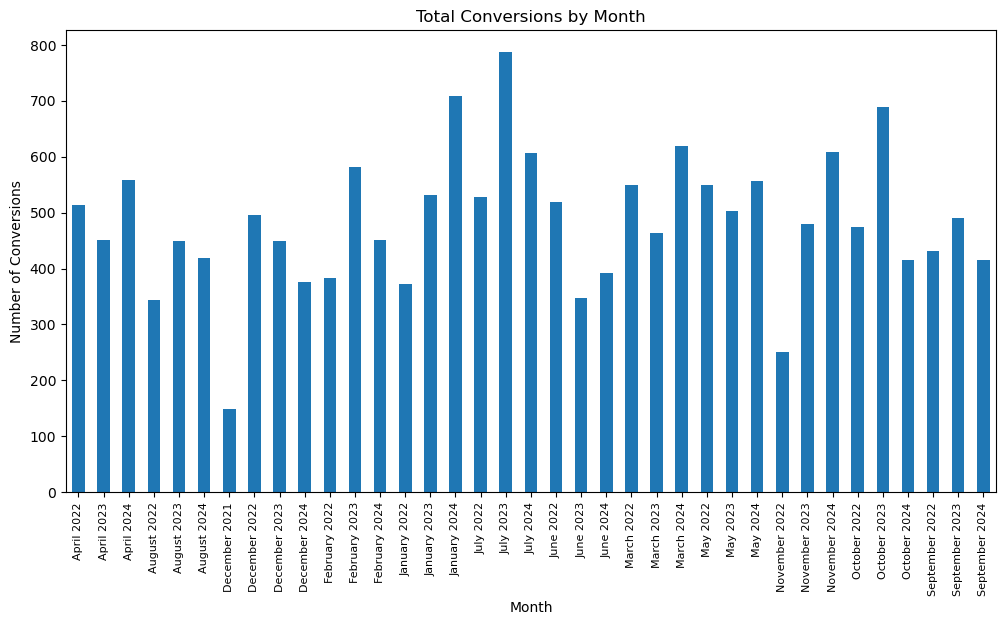

In [90]:
monthly_conversions = df.groupby('Month')['Conversions'].sum().sort_index()
monthly_conversions.plot(kind='bar', figsize=(12,6), title='Total Conversions by Month')
plot.xlabel('Month')
plot.ylabel('Number of Conversions')
plot.xticks(fontsize=8)

### Insights:
* While analyzing conversions month-wise, I observed a noticeable peak in July 2023, suggesting a higher volume of successful actions during that period. However, without additional context such as the objective of the ads (e.g., lead generation, brand awareness, sales) or campaign types, it's difficult to attribute this spike to a specific event or strategy.
* The absence of a consistent upward or downward pattern throughout the months also indicates that ads may have been run on random schedules, possibly without a long-term seasonal strategy.
* This insight highlights the importance of pairing performance metrics with campaign intent, as high conversions alone don't always reflect optimal efficiency or strategic execution. A deeper understanding of campaign goals and audience targeting would enable more meaningful conclusions.


###  Cost Efficiency Comparison

In [91]:
df.groupby('Platform')['CostPerConversion'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
Adwords,1000.0,23.97354,13.021297,5.56,14.5000,20.79,30.0000,66.33
Facebook,1000.0,15.22929,8.716668,3.21,8.8875,13.37,19.2925,49.80


### Conclusion:
* This analysis aimed to compare the performance of Facebook and Adwords campaigns using historical ad data. After exploring key marketing metrics — such as CTR, CPC, Conversion Rate, and Cost per Conversion — and applying statistical significance testing, we arrived at the following conclusions:
*  1. Facebook campaigns generally showed higher CTR and Conversion Rates, indicating more engaging and effective ads.
   2. Adwords campaigns had higher Cost per Conversion, making them relatively more expensive in terms of achieving results.
   3. Statistical t-tests revealed significant differences in CPC and CTR between platforms, validating the performance gap.
   4. While July 2023 showed a spike in conversions, without knowing campaign objectives or types, it is unclear if the uplift was strategic or incidental.
   5. The way ads were run each month doesn't follow a clear or steady pattern. This suggests that the campaigns were likely launched occasionally, rather than being tested continuously over time in a structured A/B testing process.
* In summary, Facebook campaigns performed better overall in this dataset, especially in cost-efficiency and engagement. However, future analysis should incorporate campaign objectives and segmentation (e.g., demographics, goals) for more targeted recommendations.